# 3D Plot of a vector field on $\mathbb{S}^2$

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

### $\mathbb{S}^2$ as a 2-dimensional differentiable manifold

We declare $\mathbb{S}^2$ as a differentiable manifold of dimension 2 over $\mathbb{R}$ and endow it with the stereographic charts from the North pole (`stereoN`) and the South pole (`stereoS`):

In [2]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)
U = S2.open_subset('U')
V = S2.open_subset('V')
S2.declare_union(U, V)
stereoN.<x,y> = U.chart()
stereoS.<xp,yp> = V.chart(r"xp:x' yp:y'")
stereoN_to_S = stereoN.transition_map(stereoS, (x/(x^2+y^2), y/(x^2+y^2)), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2!=0, 
                                      restrictions2= xp^2+xp^2!=0)
stereoS_to_N = stereoN_to_S.inverse()
W = U.intersection(V)
eU = stereoN.frame()
eV = stereoS.frame()
S2.frames()

[Coordinate frame (U, (d/dx,d/dy)),
 Coordinate frame (V, (d/dxp,d/dyp)),
 Coordinate frame (W, (d/dx,d/dy)),
 Coordinate frame (W, (d/dxp,d/dyp))]

<h3>Spherical coordinates</h3>
<p>The standard spherical (or polar) coordinates $(\theta,\phi)$ are defined on the open domain $A\subset W \subset \mathbb{S}^2$ that is the complement of the "origin meridian"; since the latter is the half-circle defined by $y=0$ and $x\geq 0$, we declare:</p>

In [3]:
A = W.open_subset('A', coord_def={stereoN.restrict(W): (y!=0, x<0), 
                                  stereoS.restrict(W): (yp!=0, xp<0)})
spher.<th,ph> = A.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')
spher_to_stereoN = spher.transition_map(stereoN.restrict(A), 
                                        (sin(th)*cos(ph)/(1-cos(th)),
                                         sin(th)*sin(ph)/(1-cos(th))) )
spher_to_stereoN.set_inverse(2*atan(1/sqrt(x^2+y^2)), atan2(-y,-x)+pi)
spher_to_stereoN.display()

x = -cos(ph)*sin(th)/(cos(th) - 1)
y = -sin(ph)*sin(th)/(cos(th) - 1)

### Embedding of $\mathbb{S}^2$ into $\mathbb{R}^3$
<p>Let us first declare $\mathbb{R}^3$ as a 3-dimensional manifold covered by a single chart (the so-called<strong> Cartesian coordinates</strong>):</p>

In [4]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3', start_index=1)
cart.<X,Y,Z> = R3.chart() ; cart

Chart (R^3, (X, Y, Z))

<p>The embedding of the sphere is defined as a differential mapping $\Phi: \mathbb{S}^2 \rightarrow \mathbb{R}^3$:</p>

In [5]:
Phi = S2.diff_map(R3, {(stereoN, cart): [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                                             (x^2+y^2-1)/(1+x^2+y^2)],
                       (stereoS, cart): [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                                             (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')

In [6]:
Phi.expr(stereoN.restrict(A), cart)
Phi.display(spher, cart)

Phi: S^2 --> R^3
on A: (th, ph) |--> (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

<p>Let us use $\Phi$ to draw the grid of spherical coordinates $(\theta,\phi)$ in terms of the Cartesian coordinates $(X,Y,Z)$ of $\mathbb{R}^3$:</p>

In [7]:
graph_spher = spher.plot(chart=cart, mapping=Phi, nb_values=11, color='blue')

In [8]:
graph_spher

Graphics3d Object

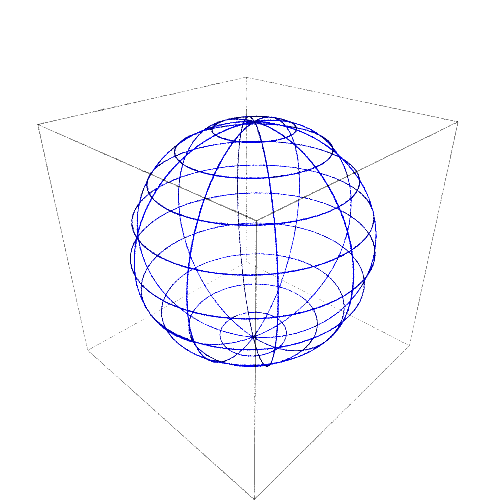

In [9]:
show(graph_spher, viewer='tachyon')

### A vector field on $\mathbb{S}^2$

In [10]:
v = S2.vector_field(name='v')
v[eU,:] = [1, -2]
v.display(eU)

v = d/dx - 2 d/dy

In [11]:
v.add_comp_by_continuation(eV, W, chart=stereoS)
v.display(eV)

v = (-xp^2 + 4*xp*yp + yp^2) d/dxp + (-2*xp^2 - 2*xp*yp + 2*yp^2) d/dyp

<p>A 3D view of the vector field $v$ is obtained via the embedding $\Phi$:</p>

In [12]:
graph_v = v.plot(chart=cart, mapping=Phi, chart_domain=spher, nb_values=11, scale=0.2)

In [13]:
graph_v

Graphics3d Object

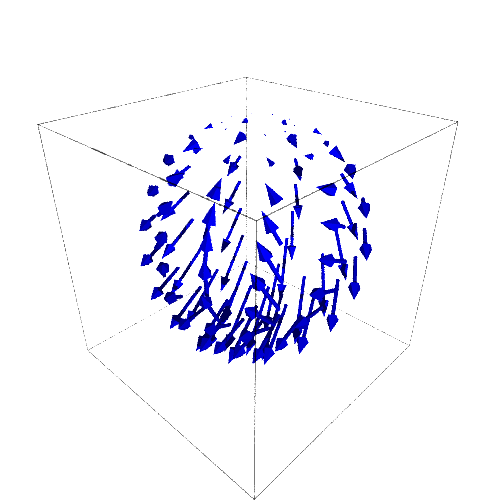

In [14]:
show(graph_v, viewer='tachyon')

Let us superpose the plot of the spherical coordinate grid:

In [15]:
graph = graph_spher + graph_v 
type(graph)

<class 'sage.plot.plot3d.base.Graphics3dGroup'>

In [16]:
graph

Graphics3d Object

If we permute `graph_v` and `graph_spher` in the graphic sum, we get an error:

In [17]:
graph = graph_v + graph_spher
type(graph)

<class 'sage.plot.plot3d.base.Graphics3dGroup'>

In [18]:
graph

error: Error -3 while decompressing: invalid distance too far back

The display with tachyon viewer is fine:

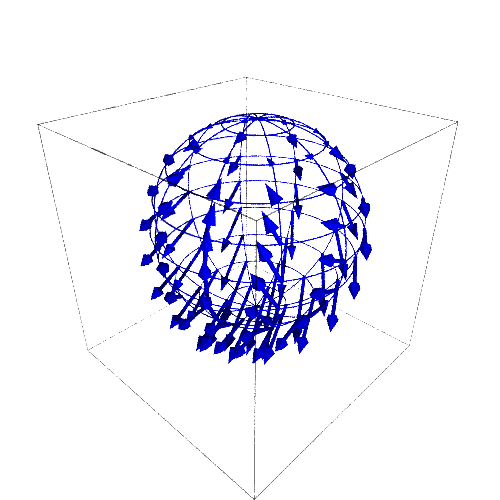

In [19]:
show(graph, viewer='tachyon')